<a href="https://colab.research.google.com/github/solharsh/ud120-projects/blob/master/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/solharsh/ud120-projects


Cloning into 'ud120-projects'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5049 (delta 0), reused 0 (delta 0), pack-reused 5046
Receiving objects: 100% (5049/5049), 19.66 MiB | 20.46 MiB/s, done.
Resolving deltas: 100% (4372/4372), done.


In [0]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    errors = (net_worths - predictions) ** 2
    cleaned_data = zip(ages, net_worths, errors)
    cleaned_data = sorted(cleaned_data, key = lambda x:x[2][0])
    
    return cleaned_data[0:int(len(cleaned_data) * 0.9)]

In [0]:
### load up some practice data with outliers in it
ages = pickle.load(open("/content/ud120-projects/outliers/practice_outliers_ages.pkl", "rb"))
net_worths = pickle.load(open("/content/ud120-projects/outliers/practice_outliers_net_worths.pkl", "rb"))

In [0]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [0]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
slope = reg.coef_
intercept = reg.intercept_

In [0]:
test_score = reg.score(ages_test, net_worths_test)
train_score = reg.score(ages_train, net_worths_train)

In [20]:
print(slope, intercept)
print(test_score, train_score)

[[5.07793064]] [25.21002155]
0.8782624703664671 0.4898725961751499


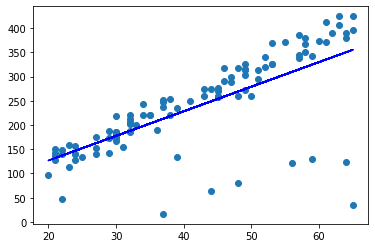

In [21]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [0]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")

The new slope is  6.368594806943669
The new intercept is  -6.918610687302305
The new score is  0.9831894553955322


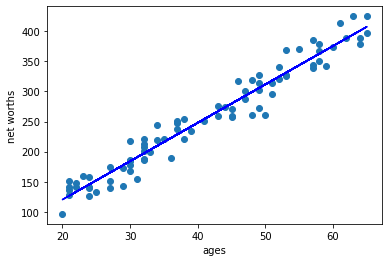

In [26]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        print ('The new slope is ', reg.coef_[0][0])
        print ('The new intercept is ', reg.intercept_[0])
        print ('The new score is ', reg.score(ages_test, net_worths_test))

        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print ("you don't seem to have regression imported/created,")
        print ("   or else your regression object isn't named reg")
        print ("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")


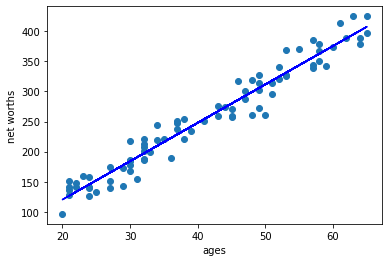

In [27]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print ("you don't seem to have regression imported/created,")
        print ("   or else your regression object isn't named reg")
        print ("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")

In [28]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
reg.coef_[0][0]

5.077930643440257

In [30]:
reg.score(ages_test,net_worths_test)

0.8782624703664671

In [0]:
#Once this cleaning function is working, you should see the regression result changes. What is the new slope? Is it closer to the “correct” result of 6.25?

%load /content/ud120-projects/outliers/outlier_cleaner.py

In [0]:
def outlierCleaner(predictions, ages, net_worths):
    """
        clean away the 10% of points that have the largest
        residual errors (different between the prediction
        and the actual net worth)

        return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error)
    """
    
    #calculate the error,make it descend sort, and fetch 90% of the data
    
    errors = (net_worths-predictions)**2
    cleaned_data =zip(ages,net_worths,errors)
    cleaned_data = sorted(cleaned_data,key=lambda x:x[2][0], reverse=True)
    limit = int(len(net_worths)*0.1)
    
    
    return cleaned_data[limit:]

In [0]:
clf_after_cleaned = linear_model.LinearRegression()

In [0]:
cleaned_d = outlierCleaner(reg.predict(ages_train),ages_train,net_worths_train)

In [0]:
age_cleaned = numpy.array([e[0] for e in cleaned_d])

In [0]:
net_worth_cleaned = numpy.array([e[1] for e in cleaned_d])

In [38]:
clf_after_cleaned.fit(age_cleaned,net_worth_cleaned)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
clf_after_cleaned.coef_

array([[6.36859481]])

In [0]:
#The slope is 6.3, and yes it's closer to 6.5

In [41]:
#And the score is
clf_after_cleaned.score(ages_test,net_worths_test)

0.9831894553955322

In [0]:
%load /content/ud120-projects/outliers/enron_outliers.py

new slope = 6.368594806943665


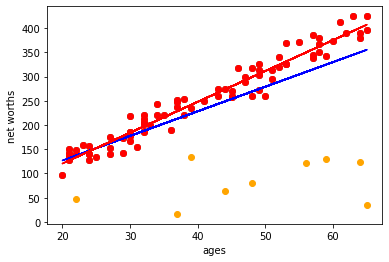

In [51]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    errors = net_worths-predictions
    threshold = numpy.percentile(numpy.absolute(errors), 90)
    #print threshold
    #print numpy.max(numpy.absolute(errors))
    #print numpy.sort(numpy.absolute(errors), axis=0)
    
    cleaned_data = [(age, net_worth, error) for age, net_worth, error in zip(ages, net_worths, errors) if abs(error) <= threshold]
    
    return cleaned_data

reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

plt.plot(ages, reg.predict(ages), color='blue')

# plot all points in blue
plt.scatter(ages, net_worths, color='blue')

# plot the current training points in orange
plt.scatter(ages_train, net_worths_train, color='orange')

### identify and remove the most outlier-y points
predictions = reg.predict(ages_train)
cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    # the non-outlier ages, net worths, and errors
    ages_train2, net_worths_train2, errors_train2 = zip(*cleaned_data)
    ages_train2       = numpy.reshape( numpy.array(ages_train2), (len(ages_train2), 1))
    net_worths_train2 = numpy.reshape( numpy.array(net_worths_train2), (len(net_worths_train2), 1))

    # refit the cleaned data
    reg2 = linear_model.LinearRegression()
    reg2.fit(ages_train2, net_worths_train2)
    plt.plot(ages, reg2.predict(ages), color='red')
    plt.scatter(ages_train2, net_worths_train2, color='red')
    plt.xlabel("ages")
    plt.ylabel("net worths")

else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")
    
    
print ('new slope = {0}'.format(reg2.coef_[0][0]))

In [52]:
#Score After Cleaning
print ('new score = {0}'.format(reg2.score(ages_test, net_worths_test)))

new score = 0.983189455395532


97343619.0


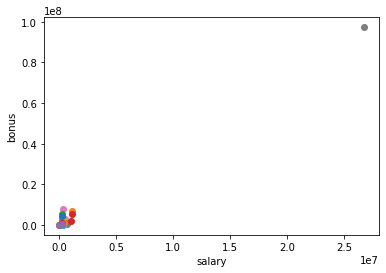

In [58]:
#Enron Outliers
from feature_format import featureFormat, targetFeatureSplit

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("/content/ud120-projects/final_project/final_project_dataset.pkl", "rb") )

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
print (data.max())
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


In [0]:
#As you can see, visualization is one of the most powerful tools for finding outliers!

#There’s one outlier that should pop out to you immediately. Now the question is to identify the source. 
#We found the original data source to be very helpful for this identification; you can find that PDF in final_project/enron61702insiderpay.pdf 
#What’s the name of the dictionary key of this data point? (e.g. if this is Ken Lay, the answer would be “LAY KENNETH L”).

TOTAL
Well, that makes sense. The total of a column isn't going to be close to the mean of that column ...

Does this outlier seem like a data point that we should include when running machine learning on this dataset? Or should we remove it?

Yes, the spreadsheet added up all the data points for us, and we need to take that "point" out.

A quick way to remove a key-value pair from a dictionary is the following line: dictionary.pop( key, 0 ) Write a line like this (you’ll have to modify the dictionary and key names, of course) and remove the outlier before calling featureFormat(). Now rerun the code, so your scatterplot doesn’t have this outlier anymore. Are all the outliers gone?



Does this outlier seem like a data point that we should include when running machine learning on this dataset? Or should we remove it?

Remove it obviously

8000000.0


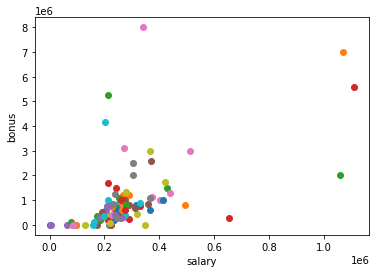

In [60]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("/content/ud120-projects/final_project/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]

data_dict.pop('TOTAL',0)

data = featureFormat(data_dict, features)


### your code below
print (data.max())
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


In [0]:
#We see 4 more outliers, although none that are as way out as the last example (the "total" line)

In [0]:
#We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. 
#Two people made bonuses around 6-8 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. 
#What are the names associated with those points?

In [63]:
from pprint import pprint
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key,int(val)))

pprint(sorted(outliers,key=lambda x:x[1],reverse=True)[:2])

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]


In [0]:
#Would you guess that these are typos or weird spreadsheet lines that we should remove, or that there’s a meaningful reason why these points are different? 
#(In other words, should they be removed before we, say, try to build a POI identifier?)
#let them be
#Yes! They're two of Enron's biggest bosses, and definitely people of interest.